<a href="https://colab.research.google.com/github/YuliaMeshcheryakova/cmpAL/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from IPython.display import display, Math
import numpy as np

Определяем функцию для создания узла дерева для хранения целых чисел

In [75]:
def integer_(x: int) -> tuple:
  return 'integer', {'value': x}

a = integer_(-34)
a

('integer', {'value': -34})

ID(x) - возвращает идентификатор узла

items(x) - возвращает список дочерних узлов

options(x) - возвращает словарь с параметрами узла

isTerminal(x) - возвращает True, если узел --- лист, т.е. не содержит дочерних узлов

In [76]:
def ID(x: tuple) -> str:
  return x[0]

def items(x: tuple) -> list:
  return x[1 :-1]

def options(x: tuple) -> dict:
  return x[-1]

def isTerminal(x: tuple) -> bool:
  return len(items(x))==0

ID(a), items(a), options(a), isTerminal(a)

('integer', (), {'value': -34}, True)

Определяем функции для преобразования узла в LaTeX-выражение

In [77]:
def latex_(x: tuple) -> str:
  cmd = eval(f"latex_{ID(x)}")
  return cmd(x)

def latex_integer(x: tuple) -> str:
  return f"{options(x)['value']}"

latex_(a)

'-34'

Определяем функцию show_ для визуализации формулы, представленной деревом x

In [78]:
def show_(x: tuple) -> None:
  display(Math(latex_(x)))

show_(integer_(-123))
print(-123)

<IPython.core.display.Math object>

-123


In [79]:
def symbol_(x: str) -> tuple:
  greek = ['alpha', 'beta', 'gamma','delta', 'epsilon', 'zeta', 'eta', 'theta',
           'iota', 'kappa', 'lambda', 'mu', 'nu', 'xi', 'o', 'pi', 'rho', 'sigma',
           'tau', 'upsilon', 'phi', 'chi', 'psi', 'omega',
           'A', 'B', 'Gamma', 'Delta', 'varepsilon', 'Epsilon', 'Z', 'H', 'vartheta', 'Theta',
           'I', 'K', 'Lambda', 'M', 'N', 'Xi', 'O', 'Pi', 'varrho', 'P', 'Sigma',
           'T', 'Upsilon', 'varphi', 'Phi', 'X', 'Psi', 'Omega',]
  n, s = x.split('_') if '_' in x else (x, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'symbol', {'name': x, 'latex': n}

def latex_symbol(x: tuple) -> str:
  return options(x)['latex']

x, alpha = symbol_('x_1'), symbol_('alpha')
show_(x)
show_(alpha)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
def add_(x: tuple, y: tuple) -> tuple:
  return 'add', x, y, {}

def sub_(x: tuple, y: tuple) -> tuple:
  return 'sub', x, y, {}

def mul_(x: tuple, y: tuple) -> tuple:
  return 'mul', x, y, {}

def div_(x: tuple, y: tuple) -> tuple:
  return 'div', x, y, {}

def deg_(x: tuple, y: tuple) -> tuple:
  return 'deg', x, y, {}

def and_(x: tuple, y: tuple) -> tuple:
  return 'and', x, y, {}

def or_(x: tuple, y: tuple) -> tuple:
  return 'or', x, y, {}

def xor_(x: tuple, y: tuple) -> tuple:
  return 'xor', x, y, {}

def eq_(x: tuple, y: tuple) -> tuple:
  return 'eq', x, y, {}

def ne_(x: tuple, y: tuple) -> tuple:
  return 'ne', x, y, {}

def lt_(x: tuple, y: tuple) -> tuple:
  return 'lt', x, y, {}

def le_(x: tuple, y: tuple) -> tuple:
  return 'le', x, y, {}

def gt_(x: tuple, y: tuple) -> tuple:
  return 'gt', x, y, {}

def ge_(x: tuple, y: tuple) -> tuple:
  return 'ge', x, y, {}

def neg_(x: tuple) -> tuple:
  return 'neg', x, {}

def inv_(x: tuple) -> tuple:
  return 'inv', x, {}

In [81]:
a = integer_(34)
x = symbol_('x')
y = symbol_('y')
f = mul_(add_(a, x), y)
print(f)

('mul', ('add', ('integer', {'value': 34}), ('symbol', {'name': 'x', 'latex': 'x'}), {}), ('symbol', {'name': 'y', 'latex': 'y'}), {})


In [82]:
priority = {'deg': 9, 'neg': 8, 'mul': 7, 'div': 7, 'add' : 6, 'and': 5, 'xor': 4, 'or': 3, 'eq': 2, 'ne': 2, 'lt': 2, 'le': 2, 'gt': 2, 'ge': 2, 'inv': 1}

def Pr(x: tuple) -> int:
  return priority.get(ID(x), 10)

print(Pr(f))

7


In [83]:
def enclose(x: str) -> str:
  return f"\\left( {x} \\right)"

In [84]:
def latex_add(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} + {{{b}}}"

def latex_mul(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x) or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \\cdot {{{b}}}"

def latex_div(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  return f"\\frac{{{a}}}{{{b}}}"

def latex_sub(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} - {{{b}}}"

def latex_deg(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x) or (ID(x[1]) == 'rational' and options(x[1])['denom'] != 1):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}}^{{{b}}}"

def latex_inv(x: tuple) -> str:
  a = latex_(x[1])
  if options(x[1]).get('value', 1)<0 or ID(x[1])=='neg':
    a = enclose(a)
  return f"\\neg {{{a}}}"

def latex_neg(x: tuple) -> str:
  a = latex_(x[1])
  if options(x[1]).get('value', 1)<0 or ID(x[1])=='neg':
    a = enclose(a)
  return f" -{{{a}}}"

def latex_and(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \wedge {{{b}}}"

def latex_or(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \vee {{{b}}}"

def latex_xor(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{a} \oplus {b}"

def latex_eq(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} = {{{b}}}"

def latex_ne(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\neq {{{b}}}"

def latex_lt(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} < {{{b}}}"

def latex_le(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\leq {{{b}}}"

def latex_gt(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} > {{{b}}}"

def latex_ge(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\geq {{{b}}}"

In [85]:
a = integer_(34)
y = integer_(10)
x = symbol_('x')
f = mul_(add_(a, y), y)
show_(f)

show_(neg_(integer_(-11)))
show_(deg_(x, integer_(-1)))
show_( div_(mul_(add_(a, y), y), neg_(y)))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [86]:
class Expression:
  def __init__(self, x):
    self.T = x

  def __add__(self, x):
    return Expression(add_(self.T, fix(x).T))

  def __mul__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __truediv__(self, x):
    return Expression(div_(self.T, fix(x).T))

  def __sub__(self, x):
    return Expression(sub_(self.T, fix(x).T))

  def __pow__(self, x):
    return Expression(deg_(self.T, fix(x).T))

  def __mul__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __and__(self, x):
    return Expression(and_(self.T, fix(x).T))

  def __or__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __xor__(self, x):
    return Expression(xor_(self.T, fix(x).T))

  def __eq__(self, x):
    return Expression(eq_(self.T, fix(x).T))

  def __lt__(self, x):
    return Expression(lt_(self.T, fix(x).T))

  def __le__(self, x):
    return Expression(le_(self.T, fix(x).T))

  def __gt__(self, x):
    return Expression(gt_(self.T, fix(x).T))

  def __ge__(self, x):
    return Expression(ge_(self.T, fix(x).T))

  def __neg__(self, x):
    return Expression(neg_(self.T))

  def __invert__(self, x):
    return Expression(inv_(self.T))

  def __radd__(self, x):
    return Expression(add_(fix(x).T, self.T))

  def __rsub__(self, x):
    return Expression(sub_(fix(x).T, self.T))

  def __rmul__(self, x):
    return Expression(mul_(fix(x).T, self.T))

  def __rtruediv__(self, x):
    return Expression(div_(fix(x).T, self.T))

  def __rpow__(self, x):
    return Expression(deg_(fix(x).T, self.T))

  def __rand__(self, x):
    return Expression(and_(fix(x).T, self.T))

  def __ror__(self, x):
    return Expression(or_(fix(x).T, self.T))

  def __rxor__(self, x):
    return Expression(xor_(fix(x).T, self.T))

def fix(x):
  if isinstance(x, int):
    return Expression(integer_(x))
  return x



Создаем обертки для функций integer_ и symbol_
опциональное (бонусное) задание: напишите функцию symbols, которая позволяет создавать сразу несколько символьных переменных: x, y, z = symbols('x y z')

In [87]:
def Z(x: int) -> Expression:
  return Expression(integer_(x))

def symbol(x: str) -> Expression:
  return Expression(symbol_(x))

def symbols(x: str) -> Expression:
  a = x.split()
  for i in range(len(a)):
     a[i] = Expression(symbol_(a[i]))
  return a

Определяем функцию show вывода выражений, заданных классом Expression
протестируйте работу всех функций на различных выражениях

In [88]:
def show(x: Expression) -> None:
  show_(x.T)

In [89]:
a, x = Z(13), symbol('x_2')

show(a / x ** a)

<IPython.core.display.Math object>

<ipython-input-90-1e3c6b446c2a>:24: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


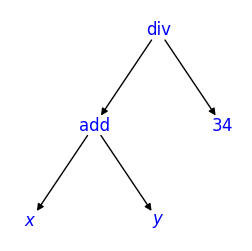

In [90]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.readwrite import json_graph

def makeGraph(x: tuple, nodes: list, labels: list, links: list) -> int:
  id_ = len(nodes)
  nodes.append({'id': id_})
  if isTerminal(x):
    labels[id_] = f'${latex_(x)}$'
  else:
    labels[id_] = x[0]
    for a in x[1:]:
      if isinstance(a, tuple):
        cid = makeGraph(a, nodes, labels, links)
        links.append({'source': id_, 'target': cid})
  return id_

def drawGraph_(x: tuple, size) -> None:
  nodes, labels, links = [], {}, []
  makeGraph(x, nodes, labels, links)
  graph = json_graph.node_link_graph({'nodes': nodes, 'links': links}, directed=True, multigraph=False)
  pos = graphviz_layout(graph, prog="dot")
  fig, ax = plt.subplots(figsize=(3 * size, 3 * size))
  ax.set_axis_off()
  nx.draw_networkx_edges(graph.to_directed(), pos, ax = ax, edge_color="black")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = labels, font_color = "blue")

def drawGraph(x: Expression, size: float = 1) -> None:
  drawGraph_(x.T, size)

x, y = symbol('x'), symbol('y')
drawGraph((x + y) / Z(34))

# Часть 2


### Факторизация

* Напишите функцию `factors(x)`, которая возвращает разложение заданного натурального числа $x$ на простые множители в виде списка этих множителей: factors`(12)` $\to$ `[2, 2, 3]`.

In [91]:
def factors(x: int) -> list:
  mn = []
  k = 2
  while x != 1:
    if x % k == 0:
      mn.append(k)
      x//=k
    else:
      k += 1
  return mn
factors(7007)

[7, 7, 11, 13]

* Напишите функцию `factorizeInt(x)`, которая преобразует заданное число `x` в произведение простых сомножителей в форме **выражения** (класс `Expression`), повторяющиеся сомножители должны входить в выражение в форме степеней: `factorizeInt(120)` $\to 2^3\cdot 3\cdot 5$.

In [92]:
def factorizeInt(x: int) -> Expression:
  mn1 = factors(x)
  mn2 =[mn1[0]]
  for i in range(len(mn1)):
    if not mn1[i] in mn2:
      mn2.append(mn1[i])

  k = Z(mn2[0])
  s1 = mn1.count(mn2[0])
  if s1 > 1:
    k **= mn1.count(mn2[0])
  for i in range(1, len(mn2)):
    s2 = mn1.count(mn2[i])
    if s2 > 1:
      k *= Z(mn2[i])**Z(s2)
    else:
      k *= Z(mn2[i])

  return k

show(factorizeInt(360))

<IPython.core.display.Math object>

In [93]:
a1 = Z(2) **Z(3)
a1 *= Z(3) **Z(5)
show(a1)

<IPython.core.display.Math object>

### Наибольший общий делитель

* Реализуйте алгоритм Евклида в виде функции `GCD(n, m)`.

In [94]:
def GCD(n: int, m: int) -> int:
  while m > 0:
    n, m = m, n % m
  return n

GCD(120, 48)

24

### Реализация рациональных чисел

* Создаем функцию-конструктор `rational_(n,m)` узлов для рациональных чисел. В каждом таком узле должно храниться нормализованное представление заданного числа.

In [95]:
def rational_(n: int, m: int) -> tuple:
  if n == 0:
    m = 1 # нормализованное представление нуля - (0, 1)
  else:
    if m < 0:
      n, m = -n, -m # знаменатель должен быть положительным
    c = GCD(abs(n), m)
    n, m = n // c, m // c # приводим дробь к несократимому виду
  return 'rational', {'num': n, 'denom': m} # num - числитель (numerator), denom - знаменатель (denominator)

* Пишем функцию `Q(n,m)` для создания выражения, представляющего рациональное число $n/m$. Знаменатель `m` по умолчанию равен `1`.

In [96]:
def Q(n: int, m: int = 1) -> Expression:
  return Expression(rational_(n, m))

Q(2, -6).T

('rational', {'num': -1, 'denom': 3})

* Напишите функцию `latex_rational(x)`, преобразующую рациональное число $x$ в формат LaTeX. Это преобразование должно учитывать, является ли число целым (единичный знаменатель не используется), для отрицательных чисел знак минус ставится перед числом, а не в числителе:
`Q(0, 5)` $\to 0$, `Q(6, -2)` $\to 3$, `Q(6, 8)` $\to \dfrac{3}{4}$, `Q(-15, 25)` $\to -\dfrac{3}{5}$.

In [97]:
def latex_rational(x: tuple) -> str:
  n, m = options(x)['num'], options(x)['denom']
  if m == 1:
    return f"{{{n}}}"
  if n < 0:
    return f"-\\frac{{{abs(n)}}}{{{m}}}"
  else:
    return f"\\frac{{{n}}}{{{m}}}"


show(Q(0, 5))
show(Q(6, -2))
show(Q(6, 8))
show(Q(-15, 25))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверяем, что рациональные числа могут быть теперь использованы для построения арифметический выражений

In [98]:
show((1 + Q(6, 4)) / (Q(152, 24) ** 2 * Q(5, 7)))

<IPython.core.display.Math object>

### Цепные дроби

* Напишите функцию `continuedTerms(n,m)`, которая преобразует заданное рациональное число $n/m$ в цепную дробь \[$a_0$; $a_1$, $a_2$, ...\] и возвращает результат в виде списка: `continuedTerms(15,11)` $\to$ `[1,2,1,3]`.

In [99]:
def continuedTerms(n: int, m: int) -> list:
  an = []
  while m > 0:
    an.append(n // m)
    n, m = m, n % m
  return an

continuedTerms(15, 11)

[1, 2, 1, 3]

* Напишите функцию, которая строит выражение, представляющее цепную дробь, в виде объекта класса `Expression`.

In [100]:
def continuedFraction(p: Expression) -> Expression:
  n, m = options(p.T)['num'], options(p.T)['denom'] # предполагаем, что p - рациональное число!
  A = continuedTerms(n, m) # находим элементы цепной дроби
  ex = Z(A[-1])
  for i in range(-2, -(len(A) + 1), -1):
    ex = A[i] + 1 / ex
  return ex

show(continuedFraction(Q(15, 11)))

<IPython.core.display.Math object>

* (бонусное задание) Напишите функцию `float2continued(x,n)`, преобразующую заданное действительное число $x$ в цепную дробь "глубины" $n$: `float2continued(np.sqrt(2),4)` $\to 1 + \frac1{2+\frac1{2+\frac1{2}}}$

In [101]:
import math

def float2continued(x: float, n: int) -> Expression:
  k = 0
  an = []
  while k < n + 1:
    an.append(math.floor(x))
    x = 1 / (x - an[k])
    k = k + 1

  ex = Z(an[-1])
  for i in range(-2, -len(an), -1):
    ex = an[i] + 1 / ex
  return ex

show(float2continued(np.pi, 5))
show(float2continued(np.sqrt(2), 5))
show(float2continued(np.exp(1), 5))
show(float2continued((np.sqrt(5)+1)/2, 5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Египетские дроби

* Напишите функцию `egyptianTerms(n,m)` разложения заданного рационального числа $n/m$ (в предположении $n < m$) в египетскую дробь, возвращающую список знаменателей найденных простых дробей: `egyptianTerms(7, 8)` $\to$ `[2, 3, 24]`.

In [102]:
import math

def egyptianTerms(n: int, m: int) -> list:
  an = []
  while n > 0:
    a = math.ceil(m/n)
    n, m = (-m) % n, m * a
    an.append(a)
  return an

egyptianTerms(7, 8)

[2, 3, 24]

* Напишите функцию, которая строит выражение, представляющее египетскую дробь, в виде объекта класса `Expression`: `egyptianSum(7,8)` $\to \frac12 + \frac13 + \frac1{24}$.

In [103]:
def egyptianSum(p: Expression) -> Expression:
  n, m = options(p.T)['num'], options(p.T)['denom']
  A = egyptianTerms(n, m)
  ex = 1 / Z(A[0])
  for i in range(1, len(A)):
    ex +=  1 / Z(A[i])
  return ex

show(egyptianSum(Q(7, 8)))

<IPython.core.display.Math object>

### Частичное оценивание арифметических выражений

В большинстве систем КА выражения, заданные пользователем, сразу же упрощаются, в частности, в них вычисляется все, что может быть вычислено.
В частности, если выражение является арифметическим и содержит только целые и рациональные числа, то это выражение преобразуется в рациональное число, например: $$\frac{\frac12+\frac23}{5}\to\frac7{30}.$$
Определим несколько функций, предназначенных для такого оценивания (evaluating) арифметических выражений над целыми и рациональными числами.

* Головная функция `evaluate(x)` оценивает выражение, заданное пользователем в виде объекта класса `Expression`, и возвращает выражение того же самого типа (класса), вызывая внутреннюю функцию `eval_` оценивания выражения в *списочном* формате.

In [104]:
def evaluate(x: Expression) -> Expression:
  return Expression(eval_(x.T))

* Функция `eval_(x)` “пытается” вызвать обработчик соответствующего узла, и если такой обработчик есть, то возвращается результат его работы.
Если обработчика нет (срабатывает исключение), то возвращается исходный узел.

In [105]:
def eval_(x: tuple) -> tuple:
  try:
    cmd = eval(f"eval_{ID(x)}") # конструируем функцию оценивания текущего узла по его ID
    return cmd(x)
  except:
    return x # возвращаем исходный узел, если обработчик не найден

* Для упрощения выполнения арифметических операций над объектами разной природы (числа разных классов, многочлены, матрицы) определим набор функций для автоматического преобразования типов (cast).
Головная функция `cast` пытается вызвать подходящий обработчик, исходя из идентификатора типа и целевого типа.

In [106]:
def cast_(x: tuple, target: str) -> tuple:
  if ID(x) == target:
    return x # преобразование не нужно, узел x уже имеет правильный тип
  try:
    cmd = eval(f"cast_{ID(x)}_{target}") # конструируем функцию преобразования
    return cmd(x)
  except:
    return x # возвращаем исходный узел, если обработчик не найден

* Реализуем один конкретный преобразователь `cast_integer_rational(x)`, который переводит целое число $x$ в формат рационального числа.

In [107]:
def cast_integer_rational(x: tuple) -> tuple:
  n = options(x)['value']
  return rational_(n, 1)

cast_integer_rational(integer_(5))

('rational', {'num': 5, 'denom': 1})

* Теперь можно создавать функции, выполняющие арифметические операции над целыми и рациональными числами. Определим две функции сложения. Имя каждой такой функции должно состоять из типа операции и списка типов операндов, разделенных знаком подчеркивания: `add_integer_integer` складывает два целых числа.

In [108]:
def add_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n + m)

def add_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb + nb * ma, ma * mb
  return rational_(n, m)

* Создадим словарь `OPERATIONS`, в котором будут перечисляться все обработчики каждой бинарной и унарной операций, подлежащих оцениванию. Ключами записей будут типы операций, значениями - списки соответствующих обработчиков.

In [109]:
OPERATIONS = {'add': ['add_integer_integer', 'add_rational_rational']}

* Создаем универсальный обработчик (оцениватель) бинарных операций `eval_binary(op,x,y)`, который просматривает список всех имеющихся обработчиков заданной операции `op`, для каждого из них пытается преобразовать заданные операнды `x` и `y` к соответствующим типам, если преобразование проходит успешно, то вызывает этот обработки и возвращает его результат. Если ни один из обработчиков не срабатывает, то возвращается исходное выражение.   

In [110]:
def eval_binary(op: str, x: tuple, y: tuple) -> tuple:
  for fop in OPERATIONS[op]:
    idx, idy = fop.split('_')[1:]
    a = cast_(x, idx)
    b = cast_(y, idy)
    if ID(a) == idx and ID(b) == idy:
      cmd = eval(f"{fop}")
      return cmd(a, b)
  return op, x, y

* Наконец, пишем оцениватель `eval_add` операции сложения, который оценывает (рекурсивно) свои операнды и вызывает универсальный обработчик `eval_binary`. Проверяем его работу. Объясните, почему не происходит оценивания в последнем примере!

In [111]:
def eval_add(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) + Q(1, 3)))
x = symbol('x')
show(evaluate(Z(2) + Z(5) + x))
show(evaluate(x + Z(2) + Z(5)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Чтобы добавить в систему обработку новых операций (например, операции умножения), нужно 1) создать соответствующие исполнители (умножение целых чисел, умножение рациональных чисел); 2) включить эти исполнители в словарь `OPERATIONS`; 3) написать обработчик соответствующего узла (`eval_mul`), если эта операция бинарная, то в данном обработчике должна вызываться функция `eval_binary`. Для примера добавим в систему оценивание операции умножения.

In [112]:
def mul_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n * m)

def mul_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return rational_(n, m)

OPERATIONS |= {'mul': ['mul_integer_integer', 'mul_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_mul(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) * Z(5)))
show(evaluate(Z(2) * Q(2, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте по этой же схеме оценивание операций вычитания и деления целых и рациональных чисел. Учтите, что при делении двух целых чисел может получиться целое число: $6/3 \to 2$, а может - рациональное: $12/8$ $\to \frac{3}{2}$.

In [113]:
# вычитание

def sub_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n - m)

def sub_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb - nb * ma , ma * mb
  return rational_(n, m)

OPERATIONS |= {'sub': ['sub_integer_integer', 'sub_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_sub(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) - Q(2, 7)))

<IPython.core.display.Math object>

In [114]:
# деление

def div_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return rational_(n, m)

def div_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb, ma * nb
  return rational_(n, m)

OPERATIONS |= {'div': ['div_integer_integer', 'div_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_div(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(6) / Z(3)))
show(evaluate(Z(6) / Z(4)))
show(evaluate(Q(5,12) / Q(10,81)))
show(evaluate((Z(6) - Q(1, 2)) / Q(2, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте оценивание операции возведения в целую степень: `Z(2) ** Z(3)` $\to 8$, `Z(2) ** Z(-3)` $\to \frac{1}{8}$, `Q(2, 3) ** Z(-2)` $\to \frac{9}{4}$.

In [115]:
def deg_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  if m >= 0:
    return integer_(n ** m)
  else:
    return rational_(1, n ** abs(m))

def deg_rational_integer(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb = options(b)['value']
  n, m = na ** abs(nb), ma ** abs(nb)
  if nb >= 0:
    return rational_(n, m)
  else:
    return rational_(m, n)

OPERATIONS |= {'deg': ['deg_integer_integer', 'deg_rational_integer']} # расширяем словарь OPERATIONS новым словарем

def eval_deg(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(6) ** Z(3)))
show(evaluate(Z(6) ** Z(-2)))
show(evaluate(Q(2, 3) ** Z(-2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте оценивание операции возведения в рациональную степень, при условии, что соответствующие корни могут быть извлечены: `Z(8) ** Q(1, 3)` $\to 2$, `Q(4, 9) ** Q(-3, 2)` $\to \frac{27}{8}$. **Но** `Z(4) ** Q(1, 3)` $\to 4^{\frac{1}{3}}$  - операция не может быть оценена.

In [122]:
def deg_integer_rational(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  nb, mb = options(b)['num'], options(b)['denom']
  if (n ** (nb / mb)).is_integer():
    return integer_(int(n ** (nb / mb)))
  else:
    return deg_(a, b)

def deg_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na ** abs(nb / mb), ma ** abs(nb / mb)
  if n.is_integer() and m.is_integer():
    if (nb >= 0):
      return rational_(int(n), int(m))
    else:
      return rational_(int(m), int(n))
  else:
    return  deg_(a, b)

OPERATIONS['deg'] = OPERATIONS['deg'] + ['deg_integer_rational', 'deg_rational_rational']

show(evaluate(Z(25) ** Q(3, 2)))

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте по аналогичной схеме универсальный оцениватель унарных операций `eval_unary` и оцениватель операции `neg` (унарный минус) для целых и рациональных чисел.  